In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

%matplotlib inline
pd.options.mode.chained_assignment = None

Import the cleaned dataset

In [42]:
listings = pd.read_csv('data/listings_cleansed.csv', index_col=0)

In [43]:
listings.head()

price  host_id neighbourhood_cleansed   latitude   longitude property_type  \
0   1413   160139      Central & Western  22.283516  114.150177     Apartment   
1    432   532909                Islands  22.200224  114.134609         Other   
2    855   304876      Central & Western  22.284074  114.155696     Apartment   
3   1060   304876      Central & Western  22.288679  114.144944     Apartment   
4    942   654642      Central & Western  22.283435  114.155392     Apartment   

         room_type  accommodates  bathrooms  bedrooms  beds  bed_type  \
0  Entire home/apt             3        1.0       1.0   2.0  Real Bed   
1  Entire home/apt             1        1.0       1.0   1.0  Real Bed   
2  Entire home/apt             6        1.0       2.0   3.0  Real Bed   
3  Entire home/apt             6        1.0       2.0   2.0  Real Bed   
4  Entire home/apt             2        1.0       1.0   1.0  Real Bed   

   number_of_reviews  review_scores_rating  review_scores_location  \
0                103                  97.0                    10.0   
1                  2                  80.0                     8.0   
2                229                  88.0                     9.0   
3                153                  88.0                     8.0   
4                 27                  97.0                    10.0   

   reviews_per_month  amenities_length  
0               1.14                27  
1               0.63                33  
2               2.66                11  
3               1.80                13  
4               0.32                11

**Let's first take a look at the distribution of room types available in Hong Kong.**

In [44]:
geojson = json.load(open("data/neighbourhoods.geojson"))

In [45]:
lon, lat = 22.3964, 114.1095
hk_map = folium.Map(location=[lon, lat],
                   tiles="Mapbox Bright", zoom_start=11)

In [46]:
listings_per_roomType = listings[['latitude', 'longitude', 'room_type']]

Define the color palette to have a better representation on the chart and map.

In [47]:
colors = ['#FF0000', '#1E90FF', '#32CD32']

Distribution of listings per room type. As expected the highest number of listings belong to 'Entire home/apt', closely followed by 'Private Room'. 

[Text(0,0.5,'Listings #'),
 Text(0.5,0,'Room Type'),
 Text(0.5,1,'Number of listings per room type')]

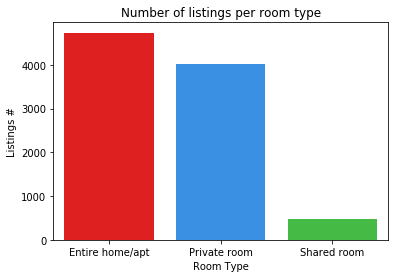

In [48]:
fig = sns.countplot(x="room_type", data=listings_per_roomType, palette=sns.color_palette(colors))
fig.set(xlabel='Room Type', ylabel='Listings #', title='Number of listings per room type')

In [49]:
for i in range(0,len(listings_per_roomType)):
    
    room_type = listings_per_roomType.iloc[i]['room_type']
    if room_type == 'Entire home/apt':
        color = 'Red'
    elif room_type == 'Private room':
        color = 'DodgerBlue'
    else:
        color = 'LimeGreen'
    
    folium.CircleMarker([listings_per_roomType.iloc[i]['latitude'],
                   listings_per_roomType.iloc[i]['longitude']],
                   radius = 1,
                   fill = True,
                   color=color).add_to(hk_map)

In [131]:
hk_map

**Price per neighborhood**

In [83]:
sns.set_palette(sns.color_palette("husl", 8))

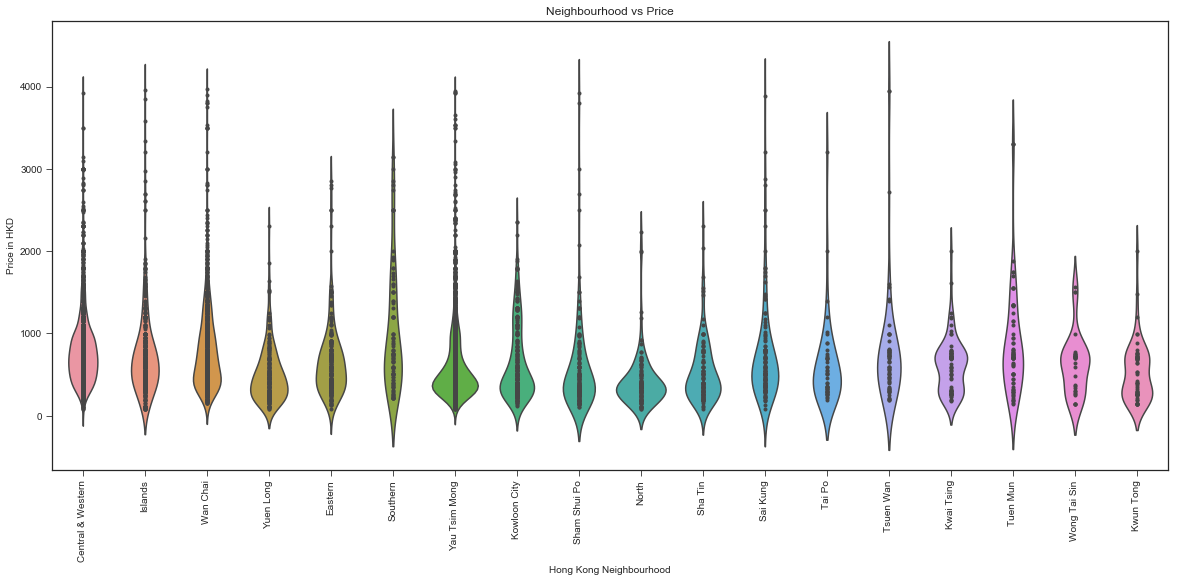

In [125]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
c = sns.violinplot(x='neighbourhood_cleansed', y='price', data=listings, inner="points", ax=ax)
c.set(xlabel='Hong Kong Neighbourhood', ylabel='Price in HKD', title='Neighbourhood vs Price')
for item in c.get_xticklabels():
    item.set_rotation(90)

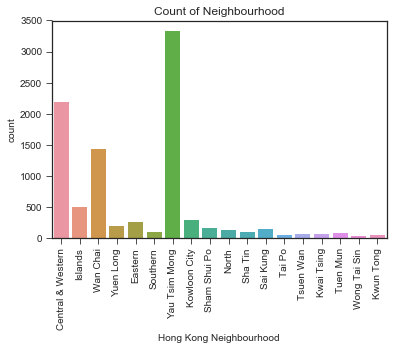

In [127]:
fig = sns.countplot(x="neighbourhood_cleansed", data=listings)
fig.set(xlabel='Hong Kong Neighbourhood', title='Count of Neighbourhood')
for item in fig.get_xticklabels():
    item.set_rotation(90)

[Text(0,0.5,'Price in HKD'),
 Text(0.5,0,'Accommodates #'),
 Text(0.5,1,'Number of accommodations vs Price')]

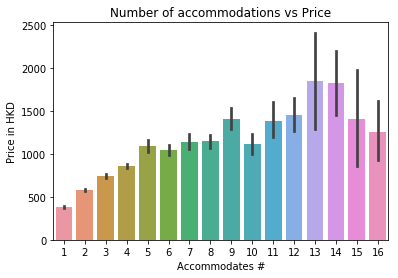

In [117]:
fig = sns.barplot(x='accommodates', y='price', data=listings)
fig.set(xlabel='Accommodates #', ylabel='Price in HKD', title='Number of accommodations vs Price')

[Text(0,0.5,'Count'), Text(0.5,0,'Accommodates #')]

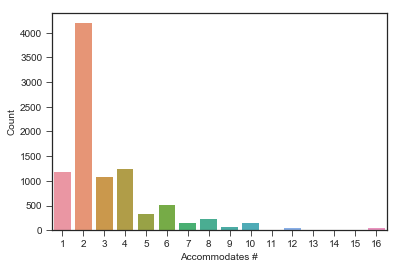

In [130]:
fig = sns.countplot(x='accommodates', data=listings)
fig.set(xlabel='Accommodates #', ylabel='Count')

[Text(0,0.5,'Price in HKD'),
 Text(0.5,0,'Bedroom #'),
 Text(0.5,1,'Number of Bedrooms vs Price')]

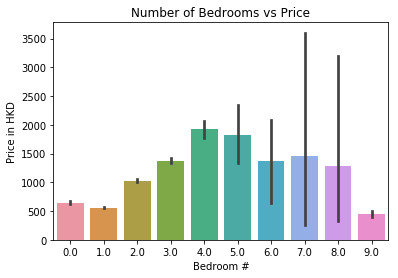

In [116]:
fig = sns.barplot(x='bedrooms', y='price', data=listings)
fig.set(xlabel='Bedroom #', ylabel='Price in HKD', title='Number of Bedrooms vs Price')

[Text(0,0.5,'Price in HKD'), Text(0.5,0,'Room Type')]

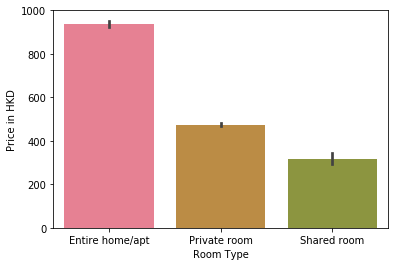

In [111]:
fig = sns.barplot(x='room_type', y='price', data=listings)
fig.set(xlabel='Room Type', ylabel='Price in HKD')

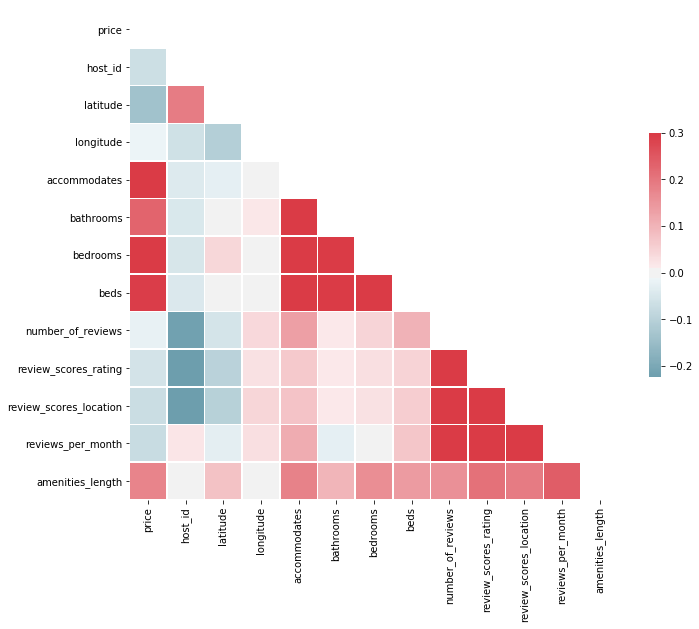

In [96]:
corr = listings.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'Price in HKD'), Text(0.5,1,'Histogram of listing prices')]

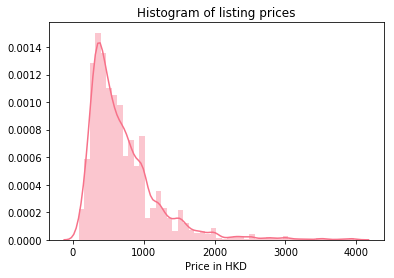

In [115]:
fig = sns.distplot(listings['price'])
fig.set(xlabel='Price in HKD', title='Histogram of listing prices')